In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
def read_datasets(folder):
    names = ['fluos', 'ods', 'fluos-lower-1', 'fluos-lower-2']
    datasets = []
    for name in names:
        datasets.append(pd.read_csv('datasets/experiment/{}/{}.csv'.format(folder, name), index_col='time'))
    return datasets

def get_control(fluos, h):
    idx = 3 * h
    gfp = fluos[filter(lambda x: x.startswith('positive-control-amp'), fluos.columns)].mean(axis=1)
    neg_amp = fluos[filter(lambda x: x.startswith('negative-control-amp'), fluos.columns)].mean(axis=1)
    neg_kan = fluos[filter(lambda x: x.startswith('negative-control-kan'), fluos.columns)].mean(axis=1)
    neg_kan_10, gfp_10, neg_amp_10 = neg_kan.iloc[idx], gfp.iloc[idx], neg_amp.iloc[idx]
    return neg_kan_10, gfp_10, neg_amp_10

def convert_rpu(fluos, ctrl):
    return (fluos - ctrl[0])/(ctrl[1] - ctrl[2])

In [3]:
ecfs = ['e11', 'e15', 'e16', 'e17', 'e20', 'e22', 'e26', 'e32', 'e33', 'e34', 'e38', 'e41', 'e42']

In [4]:
folder = '018-all-ands-first-half-first-part'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_rpu = convert_rpu(fluos_2, get_control(fluos_2, 10))

In [5]:
summary1 = pd.DataFrame()
for e in tqdm(ecfs):
    temp = fluos_rpu[filter(lambda x: x.startswith(e), fluos_rpu.columns)].iloc[3*10]
    gates = list(set([i[:-2] for i in temp.index]))
    for gate in gates:
        off = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 0)]
        on = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 1)]
        dr = np.abs(on/off)
        #if on > 1 and on < 3:
        summary1[gate] = [on, off, dr]

100%|██████████| 13/13 [00:00<00:00, 81.60it/s]


In [6]:
folder = '019-all-ands-first-half-second-part'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_rpu = convert_rpu(fluos_2, get_control(fluos_2, 10))

In [7]:
summary2 = pd.DataFrame()
for e in tqdm(ecfs):
    temp = fluos_rpu[filter(lambda x: x.startswith(e), fluos_rpu.columns)].iloc[3*10]
    gates = list(set([i[:-2] for i in temp.index]))
    for gate in gates:
        off = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 0)]
        on = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 1)]
        dr = np.abs(on/off)
        #if on > 1 and on < 3:
        summary2[gate] = [on, off, dr]

100%|██████████| 13/13 [00:00<00:00, 88.13it/s]


In [8]:
summary = pd.concat([summary1, summary2], axis=1)
summary

,e11x32gp411,e11x32STPhoRadA,e11x32NrdJ1,e11x32NrdA2,e11x32CthTer,e11x33NrdA2,e15x32gp411,e15x30MjaKlbA,e15x30SspGyrB,e15x32NpuSspS2,e15x30gp418,e15x32STIMPDH1,e16x30STsSspDnaX,e16x32M86,e16x32STPhoRadA,e16x33MjaKlbA,e16x30STPhoRadA,e16x33NrdA2,e17x32gp411,e17x30NpuSspS1LS2,e17x32NrdA2,e17x33NrdA2,e17x30STSspDnaXLS7,e17x32M86LS1,e20x32STIMPDH1,e20x30gp418,e20x32NrdJ1,e20x32gp411,e20x32M86,e20x30STsSspDnaX,e22x30gp418,e22x30STsSspDnaX,e22x30SspGyrB,e22x32NrdA2,e22x33NrdA2,e22x32gp411,e26x30STPhoRadA,e26x32NrdA2,e32x33NrdJ1,e32x32gp411,e32x30SspGyrB,e32x32NrdA2,e32x32gp418,e32x32NrdJ1,e33x32NrdA2,e33x33NrdA2,e33x30SspGyrB,e33x32STPhoRadA,e33x30STPhoRadA,e33x30MjaKlbA,e34x32M86,e34x30STNpuSspS2,e34x32gp411,e34x30SspGyrB,e34x32STIMPDH1,e34x30MjaKlbA,e38x33NrdJ1,e38x32M86,e38x32gp418,e38x33MjaKlbA,e38x30NpuSspS1,e38x30TerThyXS2,e41x32STPhoRadA,e41x32NrdA2,e41x32NrdJ1,e41x32M86,e41x30SspGyrB,e41x30STsSspDnaX,e42x30SspGyrB,e42x32NrdJ1,e42x33NrdJ1,e42x32NrdA2,e42x32M86,e42x32STIMPDH1
0,2.404721,1.425120,5.483107,3.166000,0.048719,0.489801,0.785202,0.191389,0.825603,0.191468,0.030261,0.429754,5.360399,0.476255,3.270646,0.159623,3.551155,2.720323,1.750545,0.052283,2.985780,1.667287,5.047491,1.379649,3.289421,1.495544,2.654969,2.316632,0.722541,3.096526,0.712560,0.453123,1.143265,0.957896,0.888264,0.545491,0.094902,0.066701,1.034356,2.586827,1.267199,0.263454,0.054791,1.508833,0.153138,0.044859,0.111129,0.403484,0.473011,0.533257,0.213140,0.176586,0.957421,0.245624,0.473256,0.708215,1.913295,1.517952,1.131890,1.167060,0.358219,0.721973,0.226410,0.515591,1.444435,0.180575,0.367744,0.864040,0.339168,0.327526,0.134413,0.182366,0.162501,1.195066
1,0.004515,0.001426,0.000317,0.003644,-0.001109,-0.000396,0.007050,0.006813,0.007209,0.005783,0.006733,0.004278,0.010061,0.011407,0.007763,0.009427,0.007446,0.008635,0.008872,0.008714,0.008239,0.009189,0.011487,0.002377,0.010536,0.009902,0.009744,0.010298,0.007763,0.009427,0.010932,0.013309,0.010536,0.015685,0.013942,0.011407,0.010694,0.008952,0.012782,0.008223,0.009118,0.008793,0.008793,0.016690,0.007816,0.007897,0.006594,0.014980,0.009525,0.007327,0.012782,0.023447,0.015794,0.013189,0.011886,0.012619,0.015224,0.020191,0.014980,0.012375,0.012212,0.010584,0.007979,0.009444,0.006757,0.007816,0.008060,0.014980,0.005862,0.006757,0.004152,0.007897,0.006269,0.014329
2,532.561404,999.444444,17304.000000,868.826087,43.928571,1236.600000,111.370787,28.093023,114.527473,33.109589,4.494118,100.462963,532.811024,41.750000,421.295918,16.932773,476.893617,315.045872,197.303571,6.000000,362.413462,181.439655,439.427586,580.533333,312.210526,151.032000,272.479675,224.953846,93.071429,328.478992,65.181159,34.047619,108.511278,61.070707,63.710227,47.819444,8.874074,7.451327,80.923567,314.594059,138.973214,29.962963,6.231481,90.404878,19.593750,5.680412,16.851852,26.934783,49.658120,72.777778,16.675159,7.531250,60.618557,18.623457,39.815068,56.122581,125.673797,75.181452,75.559783,94.309211,29.333333,68.215385,28.377551,54.594828,213.759036,23.104167,45.626263,57.679348,57.861111,48.469880,32.372549,23.092784,25.922078,83.403409


In [9]:
folder = '020-all-ands-second-half-first-part'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_rpu = convert_rpu(fluos_2, get_control(fluos_2, 10))

In [10]:
summary3 = pd.DataFrame()
for e in tqdm(ecfs):
    temp = fluos_rpu[filter(lambda x: x.startswith(e), fluos_rpu.columns)].iloc[3*10]
    gates = list(set([i[:-2] for i in temp.index]))
    for gate in gates:
        off = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 0)]
        on = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 1)]
        dr = np.abs(on/off)
        #if on > 1 and on < 3:
        summary3[gate] = [on, off, dr]

100%|██████████| 13/13 [00:00<00:00, 106.60it/s]


In [11]:
summary = pd.concat([summary, summary3], axis=1)
summary

,e11x32gp411,e11x32STPhoRadA,e11x32NrdJ1,e11x32NrdA2,e11x32CthTer,e11x33NrdA2,e15x32gp411,e15x30MjaKlbA,e15x30SspGyrB,e15x32NpuSspS2,e15x30gp418,e15x32STIMPDH1,e16x30STsSspDnaX,e16x32M86,e16x32STPhoRadA,e16x33MjaKlbA,e16x30STPhoRadA,e16x33NrdA2,e17x32gp411,e17x30NpuSspS1LS2,e17x32NrdA2,e17x33NrdA2,e17x30STSspDnaXLS7,e17x32M86LS1,e20x32STIMPDH1,e20x30gp418,e20x32NrdJ1,e20x32gp411,e20x32M86,e20x30STsSspDnaX,e22x30gp418,e22x30STsSspDnaX,e22x30SspGyrB,e22x32NrdA2,e22x33NrdA2,e22x32gp411,e26x30STPhoRadA,e26x32NrdA2,e32x33NrdJ1,e32x32gp411,e32x30SspGyrB,e32x32NrdA2,e32x32gp418,e32x32NrdJ1,e33x32NrdA2,e33x33NrdA2,e33x30SspGyrB,e33x32STPhoRadA,e33x30STPhoRadA,e33x30MjaKlbA,e34x32M86,e34x30STNpuSspS2,e34x32gp411,e34x30SspGyrB,e34x32STIMPDH1,e34x30MjaKlbA,e38x33NrdJ1,e38x32M86,e38x32gp418,e38x33MjaKlbA,e38x30NpuSspS1,e38x30TerThyXS2,e41x32STPhoRadA,e41x32NrdA2,e41x32NrdJ1,e41x32M86,e41x30SspGyrB,e41x30STsSspDnaX,e42x30SspGyrB,e42x32NrdJ1,e42x33NrdJ1,e42x32NrdA2,e42x32M86,e42x32STIMPDH1,e15x32CthTer,e15x30NpuSspS1,e15x32NrdA2,e15x30STPhoRadA,e15x30CthTer,e15x32STPhoRadA,e16x32CthTer,e16x32gp418,e16x30SaPdpol,e17x32NrdJ1,e17x32gp418,e17x33NrdJ1,e17x30STPhoRadA,e17x32CthTer,e17x30MPMDnaB,e20x30SaPdpol,e20x33NrdJ1,e20x30MjaKlbA,e20x30STIMPDH1,e20x32CthTer,e22x30MPMDnaB,e22x30MjaKlbA,e22x33MjaKlbA,e22x32NrdJ1,e22x33NrdJ1,e22x32STPhoRadA,e32x30NpuSspS1,e32x32CthTer,e32x33NrdA2,e32x30STPhoRadA,e34x30STPhoRadA,e34x32gp418,e34x33NrdA2,e34x30CthTer,e34x33MjaKlbA
0,2.404721,1.425120,5.483107,3.166000,0.048719,0.489801,0.785202,0.191389,0.825603,0.191468,0.030261,0.429754,5.360399,0.476255,3.270646,0.159623,3.551155,2.720323,1.750545,0.052283,2.985780,1.667287,5.047491,1.379649,3.289421,1.495544,2.654969,2.316632,0.722541,3.096526,0.712560,0.453123,1.143265,0.957896,0.888264,0.545491,0.094902,0.066701,1.034356,2.586827,1.267199,0.263454,0.054791,1.508833,0.153138,0.044859,0.111129,0.403484,0.473011,0.533257,0.213140,0.176586,0.957421,0.245624,0.473256,0.708215,1.913295,1.517952,1.131890,1.167060,0.358219,0.721973,0.226410,0.515591,1.444435,0.180575,0.367744,0.864040,0.339168,0.327526,0.134413,0.182366,0.162501,1.195066,0.015451,0.058123,0.062971,0.238942,0.032502,0.171860,0.062711,0.030771,0.014758,1.796287,0.088072,0.789622,1.232970,0.080282,0.042803,0.012161,1.162598,1.575738,3.123474,0.009565,0.010776,0.465204,0.241452,1.069636,1.002034,0.679520,0.027828,0.009218,0.119666,0.955985,0.543712,0.024279,0.115684,0.054575,0.020125
1,0.004515,0.001426,0.000317,0.003644,-0.001109,-0.000396,0.007050,0.006813,0.007209,0.005783,0.006733,0.004278,0.010061,0.011407,0.007763,0.009427,0.007446,0.008635,0.008872,0.008714,0.008239,0.009189,0.011487,0.002377,0.010536,0.009902,0.009744,0.010298,0.007763,0.009427,0.010932,0.013309,0.010536,0.015685,0.013942,0.011407,0.010694,0.008952,0.012782,0.008223,0.009118,0.008793,0.008793,0.016690,0.007816,0.007897,0.006594,0.014980,0.009525,0.007327,0.012782,0.023447,0.015794,0.013189,0.011886,0.012619,0.015224,0.020191,0.014980,0.012375,0.012212,0.010584,0.007979,0.009444,0.006757,0.007816,0.008060,0.014980,0.005862,0.006757,0.004152,0.007897,0.006269,0.014329,0.004111,0.004804,0.006881,0.004111,0.004458,0.003246,0.010776,0.009911,0.009824,0.008959,0.009478,0.009132,0.010517,0.008266,0.008180,0.007920,0.005323,0.006622,0.012248,0.006275,0.010690,0.009392,0.011902,0.008959,0.009565,0.007920,0.007660,0.005843,0.007487,0.006535,0.015018,0.011469,0.012594,0.011729,0.011296
2,532.561404,999.444444,17304.000000,868.826087,43.928571,1236.600000,111.370787,28.093023,114.527473,33.109589,4.494118,100.462963,532.811024,41.750000,421.295918,16.932773,476.893617,315.045872,197.303571,6.000000,362.413462,181.439655,439.427586,580.533333,312.210526,151.032000,272.479675,224.953846,93.071429,328.478992,65.181159,34.047619,108.511278,61.070707,63.710227,47.819444,8.874074,7.451327,80.923567,314.594059,138.973214,29.962963,6.231481,90.404878,19.593750,5.680412,16.851852,26.934783,49.658120,72.777778,16.675159,7.531250,60.618557,18.623457,39

In [12]:
folder = '021-all-ands-second-half-second-part'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_rpu = convert_rpu(fluos_2, get_control(fluos_2, 10))

In [13]:
summary4 = pd.DataFrame()
for e in tqdm(ecfs):
    temp = fluos_rpu[filter(lambda x: x.startswith(e), fluos_rpu.columns)].iloc[3*10]
    gates = list(set([i[:-2] for i in temp.index]))
    for gate in gates:
        off = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 0)]
        on = temp[filter(lambda x: x.startswith(gate), temp.index)]['{}_{}'.format(gate, 1)]
        dr = np.abs(on/off)
        #if on > 1 and on < 3:
        summary4[gate] = [on, off, dr]

100%|██████████| 13/13 [00:00<00:00, 105.25it/s]


In [14]:
summary = pd.concat([summary, summary4], axis=1)
summary

,e11x32gp411,e11x32STPhoRadA,e11x32NrdJ1,e11x32NrdA2,e11x32CthTer,e11x33NrdA2,e15x32gp411,e15x30MjaKlbA,e15x30SspGyrB,e15x32NpuSspS2,e15x30gp418,e15x32STIMPDH1,e16x30STsSspDnaX,e16x32M86,e16x32STPhoRadA,e16x33MjaKlbA,e16x30STPhoRadA,e16x33NrdA2,e17x32gp411,e17x30NpuSspS1LS2,e17x32NrdA2,e17x33NrdA2,e17x30STSspDnaXLS7,e17x32M86LS1,e20x32STIMPDH1,e20x30gp418,e20x32NrdJ1,e20x32gp411,e20x32M86,e20x30STsSspDnaX,e22x30gp418,e22x30STsSspDnaX,e22x30SspGyrB,e22x32NrdA2,e22x33NrdA2,e22x32gp411,e26x30STPhoRadA,e26x32NrdA2,e32x33NrdJ1,e32x32gp411,e32x30SspGyrB,e32x32NrdA2,e32x32gp418,e32x32NrdJ1,e33x32NrdA2,e33x33NrdA2,e33x30SspGyrB,e33x32STPhoRadA,e33x30STPhoRadA,e33x30MjaKlbA,e34x32M86,e34x30STNpuSspS2,e34x32gp411,e34x30SspGyrB,e34x32STIMPDH1,e34x30MjaKlbA,e38x33NrdJ1,e38x32M86,e38x32gp418,e38x33MjaKlbA,e38x30NpuSspS1,e38x30TerThyXS2,e41x32STPhoRadA,e41x32NrdA2,e41x32NrdJ1,e41x32M86,e41x30SspGyrB,e41x30STsSspDnaX,e42x30SspGyrB,e42x32NrdJ1,e42x33NrdJ1,e42x32NrdA2,e42x32M86,e42x32STIMPDH1,e15x32CthTer,e15x30NpuSspS1,e15x32NrdA2,e15x30STPhoRadA,e15x30CthTer,e15x32STPhoRadA,e16x32CthTer,e16x32gp418,e16x30SaPdpol,e17x32NrdJ1,e17x32gp418,e17x33NrdJ1,e17x30STPhoRadA,e17x32CthTer,e17x30MPMDnaB,e20x30SaPdpol,e20x33NrdJ1,e20x30MjaKlbA,e20x30STIMPDH1,e20x32CthTer,e22x30MPMDnaB,e22x30MjaKlbA,e22x33MjaKlbA,e22x32NrdJ1,e22x33NrdJ1,e22x32STPhoRadA,e32x30NpuSspS1,e32x32CthTer,e32x33NrdA2,e32x30STPhoRadA,e34x30STPhoRadA,e34x32gp418,e34x33NrdA2,e34x30CthTer,e34x33MjaKlbA,e15x32gp418,e15x30TerThyXS1,e15x30TerThyXS2,e15x30TvoVMA,e16x30CthTer,e16x30TerThyXS1,e17x32STIMPDH1,e17x33MjaKlbA,e17x30CthTer,e17x30SaPdpol,e17x32STPhoRadA,e17x30MjaKlbA,e20x33MjaKlbA,e20x30STPhoRadA,e20x32NrdA2,e20x32STPhoRadA,e20x32gp418,e20x33NrdA2,e22x32gp418,e22x32CthTer,e22x30CthTer,e22x32STIMPDH1,e22x30STPhoRadA,e22x30SaPdpol,e33x30SaPdpol,e33x30TerThyXS1,e33x32CthTer,e34x33NrdJ1,e34x32NrdJ1,e34x30SaPdpol,e34x32NrdA2,e38x32CthTer,e41x32gp418,e42x33NrdA2,e42x30SaPdpol,e42x32STPhoRadA
0,2.404721,1.425120,5.483107,3.166000,0.048719,0.489801,0.785202,0.191389,0.825603,0.191468,0.030261,0.429754,5.360399,0.476255,3.270646,0.159623,3.551155,2.720323,1.750545,0.052283,2.985780,1.667287,5.047491,1.379649,3.289421,1.495544,2.654969,2.316632,0.722541,3.096526,0.712560,0.453123,1.143265,0.957896,0.888264,0.545491,0.094902,0.066701,1.034356,2.586827,1.267199,0.263454,0.054791,1.508833,0.153138,0.044859,0.111129,0.403484,0.473011,0.533257,0.213140,0.176586,0.957421,0.245624,0.473256,0.708215,1.913295,1.517952,1.131890,1.167060,0.358219,0.721973,0.226410,0.515591,1.444435,0.180575,0.367744,0.864040,0.339168,0.327526,0.134413,0.182366,0.162501,1.195066,0.015451,0.058123,0.062971,0.238942,0.032502,0.171860,0.062711,0.030771,0.014758,1.796287,0.088072,0.789622,1.232970,0.080282,0.042803,0.012161,1.162598,1.575738,3.123474,0.009565,0.010776,0.465204,0.241452,1.069636,1.002034,0.679520,0.027828,0.009218,0.119666,0.955985,0.543712,0.024279,0.115684,0.054575,0.020125,0.007776,0.005694,0.045002,0.003061,0.104883,0.137027,1.970978,0.152885,0.544558,0.440839,1.110608,1.399051,0.180866,1.456850,0.940946,1.815031,0.117741,0.234012,0.083270,0.196296,0.243380,0.595439,0.399939,0.026940,0.001959,0.005939,0.002816,0.081616,0.183499,0.065391,0.088168,0.382489,0.020144,0.007592,-0.000429,0.006919
1,0.004515,0.001426,0.000317,0.003644,-0.001109,-0.000396,0.007050,0.006813,0.007209,0.005783,0.006733,0.004278,0.010061,0.011407,0.007763,0.009427,0.007446,0.008635,0.008872,0.008714,0.008239,0.009189,0.011487,0.002377,0.010536,0.009902,0.009744,0.010298,0.007763,0.009427,0.010932,0.013309,0.010536,0.015685,0.013942,0.011407,0.010694,0.008952,0.012782,0.008223,0.009118,0.008793,0.008793,0.016690,0.007816,0.007897,0.006594,0.014980,0.009525,0.007327,0.012782,0.023447,0.015794,0.013189,0.011886,0.012619,0.015224,0.020191,0.014980,0.012375,0.012212,0.010584,0.007979,0.009444,0.006757,0.007816,0.008060,0.014980,0.005862,0.006757,0.004152,0.007897,0.006269,0.014329,0.004111,0.004804,0.006881,0.004111,0.004458,0.003246,0.01

In [15]:
summary.to_csv('datasets/complete_and_gates/fluo.csv', index=False)

### EDA

/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


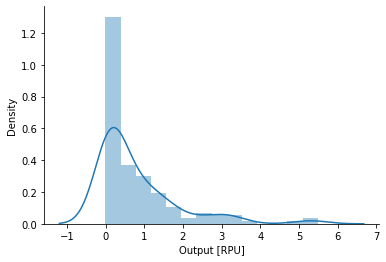

In [16]:
sns.distplot(summary.iloc[0], label=e)
#plt.legend()
plt.xlabel('Output [RPU]')
sns.despine()

/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

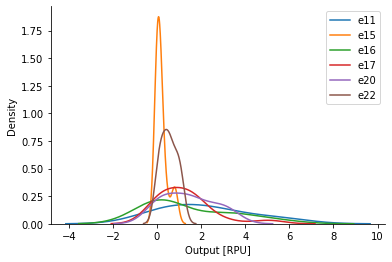

In [18]:
for e in ecfs[:6]:
    if e != 'e26':
        sns.distplot(summary[filter(lambda x: x.startswith(e), summary.columns)].iloc[0], hist=False, label=e)
plt.legend()
plt.xlabel('Output [RPU]')
sns.despine()

/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

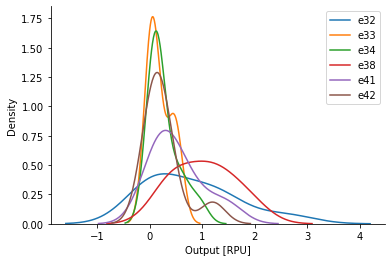

In [17]:
for e in ecfs[-6:]:
    if e != 'e26':
        sns.distplot(summary[filter(lambda x: x.startswith(e), summary.columns)].iloc[0], hist=False, label=e)
plt.legend()
plt.xlabel('Output [RPU]')
sns.despine()

<ipython-input-24-ddea01713c25>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp.columns, rotation=90)


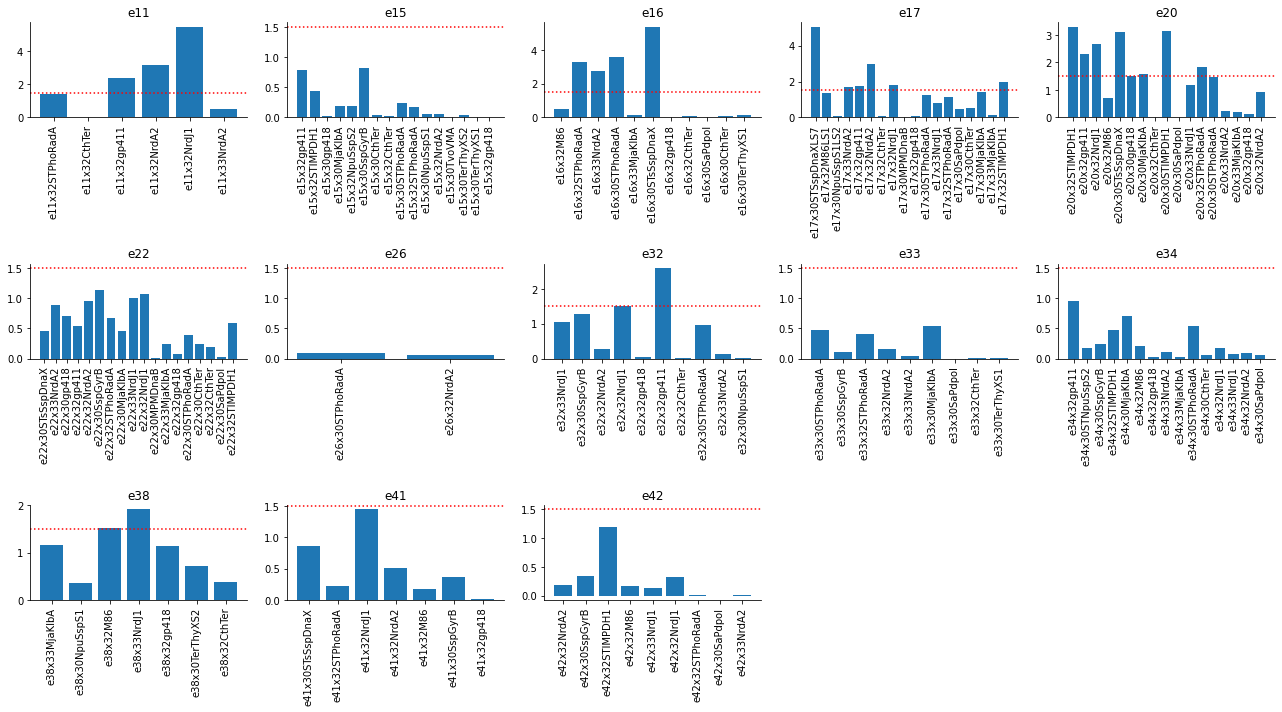

In [24]:
f, axs = plt.subplots(3, 5, sharex=False, sharey=False, figsize=(18, 10))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < len(ecfs):
        temp = summary[filter(lambda x: x.startswith(ecfs[i]), summary.columns)]
        ax.bar(temp.columns, temp.iloc[0])
        ax.set_xticklabels(temp.columns, rotation=90)
        ax.set_title(ecfs[i])
        ax.axhline(1.5, color='red', linestyle='dotted')
        sns.despine()
    else:
        ax.set_visible(False)
plt.tight_layout()

In [25]:
selections = """e11 PhoradA
    e16 NrdA2
    e17 MjaKlbA
    e20 gp418
    e32 SspGyrB
    e34 gp411
    e38 M86
    e41 NrdJ1
    e42 STMPDH1"""

In [26]:
gates = ['e11x32STPhoRadA', 'e15x32NpuSspS2', 'e16x33NrdA2', 'e17x30MjaKlbA', 'e20x32gp411', 'e32x30SspGyrB', 'e34x30MjaKlbA',
         'e38x32gp418', 'e41x32NrdJ1', 'e42x32STIMPDH1']
summary[gates].iloc[0]

e11x32STPhoRadA    1.425120
e15x32NpuSspS2     0.191468
e16x33NrdA2        2.720323
e17x30MjaKlbA      1.399051
e20x32gp411        2.316632
e32x30SspGyrB      1.267199
e34x30MjaKlbA      0.708215
e38x32gp418        1.131890
e41x32NrdJ1        1.444435
e42x32STIMPDH1     1.195066
Name: 0, dtype: float64

/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


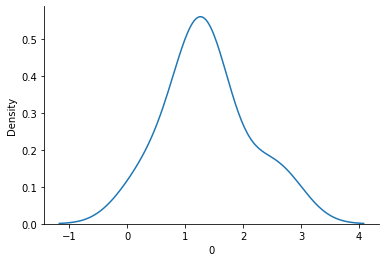

In [31]:
sns.distplot(summary[gates].iloc[0], hist=False)
sns.despine()

In [35]:
inteins = list(set([i.split('x')[1] for i in summary.columns.tolist()]))
ecf_proteins = list(set([i.split('x')[0] for i in summary.columns.tolist()]))

In [39]:
inteins

['33NrdA2',
 '33MjaKlbA',
 '30CthTer',
 '30gp418',
 '30STNpuSspS2',
 '30STSspDnaXLS7',
 '32STPhoRadA',
 '30NpuSspS1LS2',
 '33NrdJ1',
 '32M86',
 '30MPMDnaB',
 '32CthTer',
 '30STsSspDnaX',
 '30NpuSspS1',
 '32NpuSspS2',
 '30STPhoRadA',
 '32STIMPDH1',
 '30SspGyrB',
 '30TvoVMA',
 '30MjaKlbA',
 '32NrdA2',
 '30STIMPDH1',
 '32M86LS1',
 '32gp418',
 '32gp411',
 '30TerThyXS2',
 '30SaPdpol',
 '30TerThyXS1',
 '32NrdJ1']

<ipython-input-44-e1e4ca8746de>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp.columns, rotation=90)


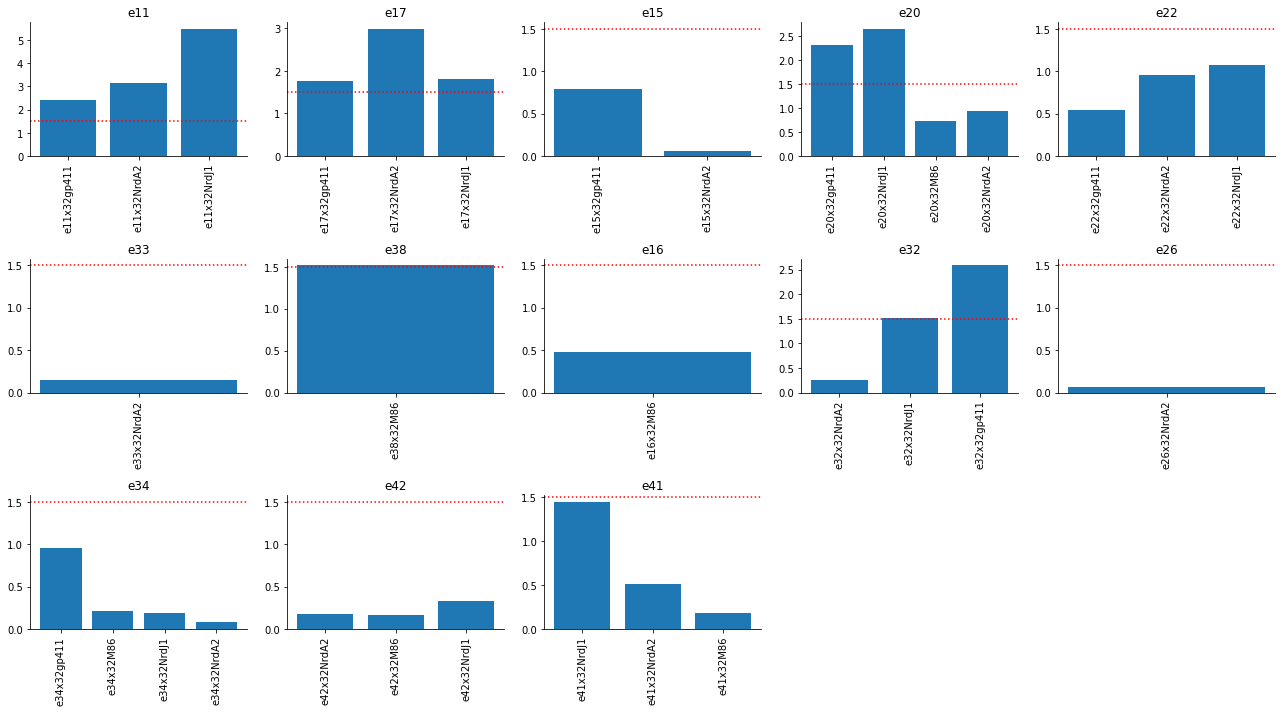

In [44]:


f, axs = plt.subplots(3, 5, sharex=False, sharey=False, figsize=(18, 10))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < len(ecf_proteins):
        temp1 = summary[filter(lambda x: x.startswith(ecf_proteins[i]), summary.columns)]
        temp = temp1[filter(lambda x: x.endswith('32NrdA2') or x.endswith('32NrdJ1') or x.endswith('32gp411') or x.endswith('32M86'), temp1.columns)]
        ax.bar(temp.columns, temp.iloc[0])
        ax.set_xticklabels(temp.columns, rotation=90)
        ax.set_title(ecf_proteins[i])
        ax.axhline(1.5, color='red', linestyle='dotted')
        sns.despine()
    else:
        ax.set_visible(False)
plt.tight_layout()

In [102]:
df = pd.DataFrame([('e11', 1.425120, 3.605028), ('e15', 0.191468, 1.020059), ('e16', 2.720323, 5.112844),
                   ('e20', 2.316632, 4.496186), ('e32', 1.267199, 5.784836), ('e34', 0.708215, 3.521174),
                   ('e38', 1.131890, 1.110462), ('e41', 1.444435, 3.255877), ('e42', 1.195066, 3.551923),
                  ])
df.columns = ['name', 'gate', 'control']
df['ratio'] = df['control']/df['gate']
df

,name,gate,control,ratio
0,e11,1.425120,3.605028,2.529631
1,e15,0.191468,1.020059,5.327569
2,e16,2.720323,5.112844,1.879499
3,e20,2.316632,4.496186,1.940829
4,e32,1.267199,5.784836,4.565057
5,e34,0.708215,3.521174,4.971900
6,e38,1.131890,1.110462,0.981069
7,e41,1.444435,3.255877,2.254083
8,e42,1.195066,3.551923,2.972156


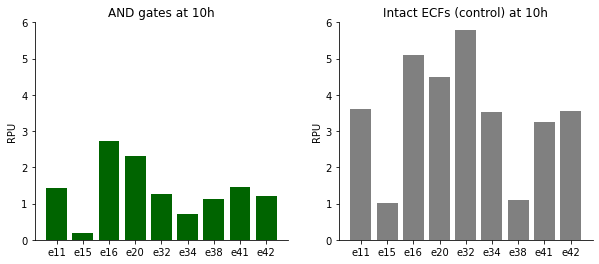

In [120]:
plt.figure(figsize=[10, 4])
plt.subplot(121)
plt.bar(df.name, df.gate, color='darkgreen')
plt.title('AND gates at 10h')
plt.ylabel('RPU')
plt.ylim([0, 6])
sns.despine()
plt.subplot(122)
plt.bar(df.name, df.control, color='gray')
plt.ylabel('RPU')
plt.title('Intact ECFs (control) at 10h')
plt.ylim([0, 6])
sns.despine()

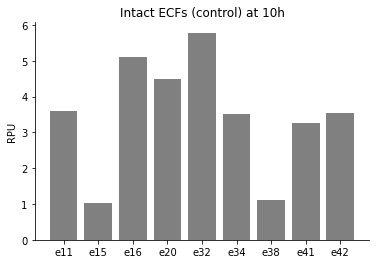

In [81]:
best3 = []
for e in ecfs:
    best3.append(summary[filter(lambda x: x.startswith(e), summary.columns)].T.sort_values(0)[:3])
best3

[                        0         1            2
 e11x32CthTer     0.048719 -0.001109    43.928571
 e11x33NrdA2      0.489801 -0.000396  1236.600000
 e11x32STPhoRadA  1.425120  0.001426   999.444444,
                      0         1         2
 e15x32CthTer  0.015451  0.004111  3.757895
 e15x30gp418   0.030261  0.006733  4.494118
 e15x30CthTer  0.032502  0.004458  7.291262,
                       0         1         2
 e16x30SaPdpol  0.014758  0.009824  1.502203
 e16x32gp418    0.030771  0.009911  3.104803
 e16x32CthTer   0.062711  0.010776  5.819277,
                           0         1         2
 e17x30MPMDnaB      0.042803  0.008180  5.232804
 e17x30NpuSspS1LS2  0.052283  0.008714  6.000000
 e17x32CthTer       0.080282  0.008266  9.712042,
                       0         1          2
 e20x32CthTer   0.009565  0.006275   1.524138
 e20x30SaPdpol  0.012161  0.007920   1.535519
 e20x32M86      0.722541  0.007763  93.071429,
                          0         1          2
 e22x30MPM

In [90]:
gates = ['e11x32STPhoRadA', 'e16x33NrdA2', 'e20x30gp418', 'e32x30SspGyrB',
         'e34x32gp411', 'e38x32M86', 'e41x32NrdJ1', 'e42x32STIMPDH1']
selected = summary[gates]

/Users/mardian/Documents/Edinburgh/Notebook/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


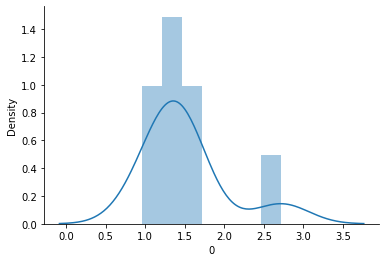

In [92]:
sns.distplot(selected.iloc[0])
sns.despine()

In [ ]:
#closest ratio
'e11x32STPhoRadA'
'e16x33NrdA2'
'e20x30gp418' ('e20x32gp411')
'e32x30SspGyrB'
'e34x32gp411' ('e34x30MjaKlbA')
'e38x32M86' ('e38x32gp418')
'e41x32NrdJ1'
'e42x32STIMPDH1'

In [ ]:
#unused
'e15x30SspGyrB'
'e17x32M86LS1'
'e22x30SspGyrB'
'e26x30STPhoRadA'
'e33x30MjaKlbA'

In [ ]:
import colorsys
def get_N_HexCol(N=13):
    HSV_tuples = [(x * 1.0 / N, 0.5, 0.5) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

cols = get_N_HexCol()

In [ ]:
cols = sns.color_palette(None, 13)

In [ ]:
plt.figure(figsize=[10, 6])
for i, e in enumerate(ecfs):
    selection = summary[filter(lambda x: x.startswith(e), summary.columns)]
    marker = '+' if i > 9 else 'o'
    plt.scatter(selection.iloc[1], selection.iloc[0], color=cols[i], label=e, marker=marker)
plt.ylim([1.3, 2])
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[10, 6])
for i, e in enumerate(ecfs):
    selection = summary[filter(lambda x: x.startswith(e), summary.columns)]
    marker = '+' if i > 9 else 'o'
    plt.scatter(selection.iloc[1], selection.iloc[0], color=cols[i], label=e, marker=marker)
plt.ylim([0, 0.5])
plt.legend()
plt.show()